In [ ]:
# Origen y descripción de conjunto de datos:
# https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records


/export/apps/bioconda/bin/python


In [3]:
# Importar librerías
import pandas as pd
# Importar kNN
from sklearn.neighbors import KNeighborsClassifier
# Importar objeto para k-fold cross-validation con búsqueda aleatoria de hyperparámetros
from sklearn.model_selection import RandomizedSearchCV
# Importar objeto para separación de datos en conjuntos de entrenamiento y evaluación
from sklearn.model_selection import train_test_split, cross_val_score
# Obtener valore de una distribución uniforme
from scipy.stats import uniform, expon
# Importar objeto para escalamiento de datos
from sklearn.preprocessing import StandardScaler
# Importar metricas de evaluación
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, make_scorer
# Importar objeto para imprimir matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Importar objeto para imprimir reporte de clasificación 
from sklearn.metrics import classification_report
# Plots
import matplotlib.pyplot as plt

import numpy as np

# Import object to plot Precision-Recall curve
# from sklearn.metrics import PrecisionRecallDisplay

In [4]:
# Leer datos en dataframe
data = pd.read_csv("../data/cvd_transformed.csv")
data.head(6)

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse,bmi_clasification,pulse_clasification
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30,Peso normal,2
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50,Obesidad,4
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60,Peso normal,4
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50,Sobrepeso,4
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40,Peso normal,3
5,8,21914,60.038356,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,40,Sobrepeso,3


In [8]:
# Verificar categorías de clase
data['cardio'].unique()

array([0, 1], dtype=int64)

In [9]:
# Verificar dimensionalidad de datos
data.shape

(61839, 18)

In [10]:

# Preparar datos
# X = sólo datos de características de ejemplos
# y = categorías de clase para cada ejemplo
X = data.iloc[:, np.r_[2, 8:12, 14:15]]
y = data.iloc[:, 13]  # all rows, label only
print("Datos")
print(X.head())
print("Categorias de clase")
print(y.head())


Datos
    age_year  cholesterol  gluc  smoke  alco        bmi
0  50.391781            1     1      0     0  21.967120
1  55.419178            3     1      0     0  34.927679
2  51.663014            3     1      0     0  23.507805
3  48.282192            1     1      0     0  28.710479
4  47.873973            1     1      0     0  23.011177
Categorias de clase
0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64


In [11]:
# Escalamiento de datos
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print("Datos")
print(X)

Datos
[[-0.41252876 -0.51957914 -0.38479629 -0.30994665 -0.23537015 -1.12322809]
 [ 0.33066899  2.48212624 -0.38479629 -0.30994665 -0.23537015  1.82539772]
 [-0.22460301  2.48212624 -0.38479629 -0.30994665 -0.23537015 -0.77271049]
 ...
 [-0.06948326 -0.51957914 -0.38479629  3.22636167 -0.23537015  0.00528188]
 [ 1.2229113  -0.51957914  1.38952461 -0.30994665 -0.23537015  0.04437073]
 [ 0.45703285  0.98127355 -0.38479629 -0.30994665 -0.23537015 -0.45290544]]


In [12]:
print(scaler.mean_)

[5.31823517e+01 1.34618930e+00 1.21686961e+00 8.76469542e-02
 5.24911464e-02 2.69042213e+01]


In [13]:
# Separación de datos en conjuntos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
# Rango de valores posibles para k
k_values = range(30, 41)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)  # cv=5 para 5-Fold Cross-Validation
    scores.append(score.mean())

# Mejor valor de k
best_k = k_values[np.argmax(scores)]
print("El mejor valor de k:", best_k)


El mejor valor de k: 40


In [15]:
# kNN

k=40
neigh = KNeighborsClassifier(n_neighbors=k)


In [16]:
classifier = neigh.fit(X_train, y_train)

In [17]:
# Evaluación
y_pred= classifier.predict(X_test)
print("Resultados de evaluación")
print("F-1 weighted: {}".format(f1_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("AUROC weighted: {}".format(roc_auc_score(y_test, y_pred, average='weighted')))

Resultados de evaluación
F-1 weighted: 0.5714553287132422
Precision: 0.6182370820668693
Recall: 0.5312554414069302
AUROC weighted: 0.6234390414581821


In [18]:
# Matriz de confusión
svm_confusion_matrix=confusion_matrix(y_test,y_pred)
print(svm_confusion_matrix)

[[4741 1884]
 [2692 3051]]


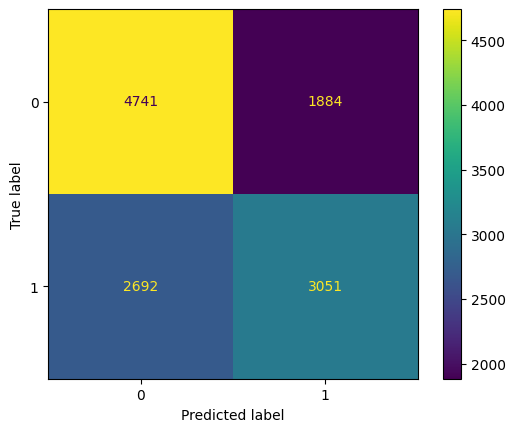

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_confusion_matrix)
disp.plot()
plt.show()

In [20]:
# Reporte de clasificación
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.72      0.67      6625
           1       0.62      0.53      0.57      5743

    accuracy                           0.63     12368
   macro avg       0.63      0.62      0.62     12368
weighted avg       0.63      0.63      0.63     12368



Text(0.5, 0, 'False Positive Rate')

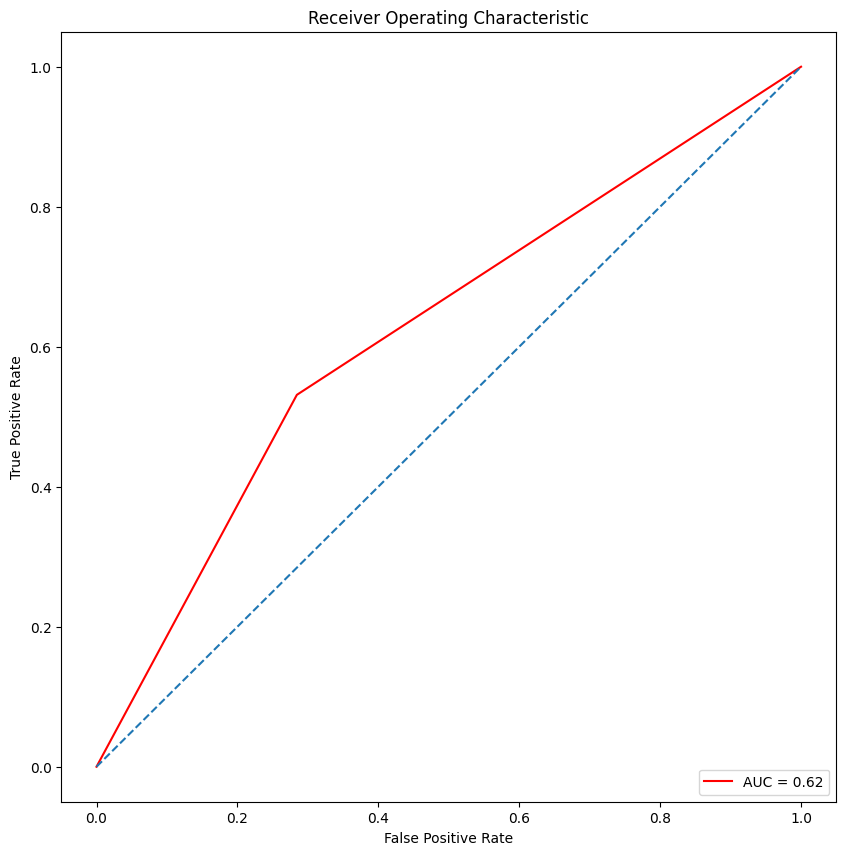

In [21]:
# Plot ROC curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred, average='weighted')
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % auc_roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')